Extracting input/data/train-images-idx3-ubyte.gz
Extracting input/data/train-labels-idx1-ubyte.gz
Extracting input/data/t10k-images-idx3-ubyte.gz
Extracting input/data/t10k-labels-idx1-ubyte.gz
9999                                                                                                                                                                                                                                                          

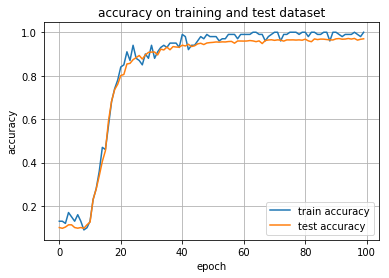

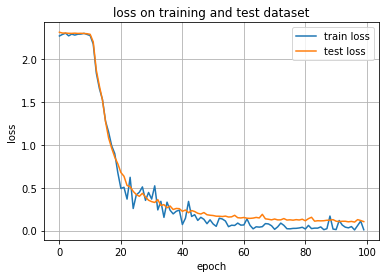

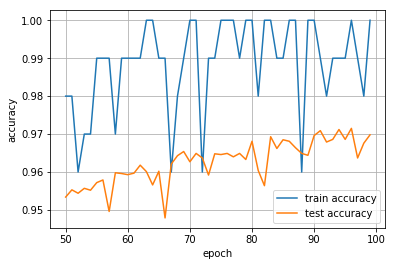

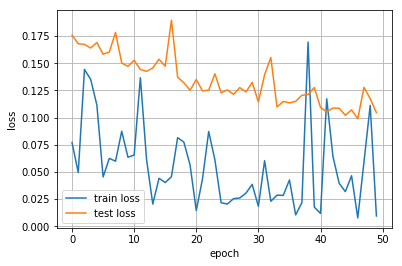

 test accuracy 0.9698
test loss 0.104447


In [3]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

BATCH_SIZE = 100
IMAGE_SIZE = 28
NUM_CHANNELS = 1

tf.set_random_seed(0)

# load data
mnist = input_data.read_data_sets('input/data', one_hot=True)

# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32, [None, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS]) #the first dimension (None) will index the images
# correct answers
Y_ = tf.placeholder(tf.float32, [None, 10])

# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
B2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
B3 = tf.Variable(tf.zeros([60]))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
B4 = tf.Variable(tf.zeros([30]))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))
# 2. Define the model
XX = tf.reshape(X, [-1, 784])
relu = tf.nn.relu
sigmoid = tf.sigmoid

activation = sigmoid # control to use relu or sigmoid
Y1 = activation(tf.matmul(XX, W1) + B1)
Y2 = activation(tf.matmul(Y1, W2) + B2)
Y3 = activation(tf.matmul(Y2, W3) + B3)
Y4 = activation(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)
# 3. Define the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y_, logits = Ylogits) # calculate cross-entropy with logits
cross_entropy = tf.reduce_mean(cross_entropy)

# 4. Define the accuracy
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 5. Define an optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train_step = optimizer.minimize(cross_entropy)

# initialize
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc
    
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.title("accuracy on training and test dataset")
plt.plot(train_a, label = "train accuracy")
plt.plot(test_a, label = "test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.title("loss on training and test dataset")
plt.plot(train_c, label = "train loss")
plt.plot(test_c, label = "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:], label = "train accuracy")
plt.plot(x_range, test_a[zoom_point:], label = "test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:], label = "train loss")
plt.plot(test_c[zoom_point:], label = "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('test accuracy ' + str(test_a[-1]))
print('test loss ' + str(test_c[-1]))

ReLU + softmax:

test accuracy 0.9783
test loss 0.12008

sigmoid + softmax:

test accuracy 0.9698
test loss 0.104447


- What is the maximum accuracy that you can get in each setting for running your model with 10000 iterations?

relu gets higher accuracy


- Is there a big difference between the convergence rate of the sigmoid and the ReLU? If yes, what is the reason for the difference?

ReLU gives faster convergence than sigmoid. Because sigmoid is easier to face gradient vanish with the number of layers increasing


- What is the reason that we use the softmax in our output layer?

Softmax then normalizes weights, those weights add up to one. softmax function can generate the probabilities for m different classes, it is suited for multinomial classification.


- By zooming into the second half of the epochs in accuracy and loss plot, do you see any strange behaviour? What is the reason and how you can overcome them? (e.g., look at fluctuations or sudden loss increase after a period of decreasing loss).

accuracy decreased in both training and test data: gradient drop to an local minimal, or learning rate too high.

accuracy decreased in training dataset: maybe a different batch

accuracy decreased in test dataset: maybe overfitting, overcome by regularization.